Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
insurance_reg = pd.read_csv("insurance.csv")
insurance_reg.shape
insurance_reg.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Question 2 - Check the distribution of expenses(charges) and state your insights.

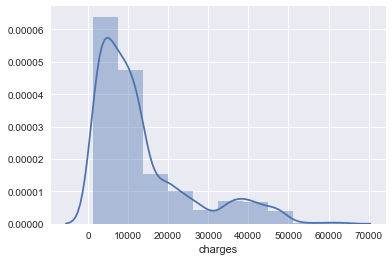

In [2]:
sns.distplot(insurance_reg["charges"],bins =10)
# Data distribution of variable "charges" is right skewed.
# mean is greater than median

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

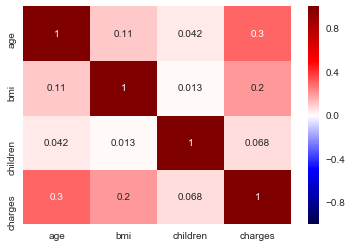

In [3]:
insurance_reg.corr()
sns.heatmap(insurance_reg.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

# Question 4 - Visualize the relationship among various variables/features. 

You can use pairplot function and create a scatterplot matrix to do so.

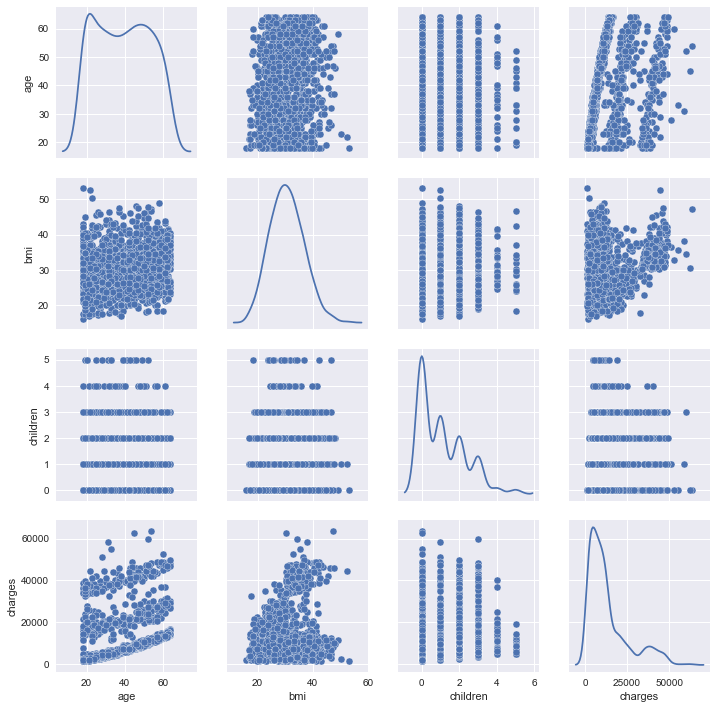

In [4]:
sns.pairplot(insurance_reg[['age',  'bmi', 'children','charges']], diag_kind = 'kde')

# Question 5 - Get the train and test data from your dataset.

In [26]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Question 6 - Create the dummies for the categorical variables/features.

You can use pd.get_dummies() function to do so.

In [37]:
X = insurance_reg.iloc[:, :-1].values
y = insurance_reg.iloc[:, 6].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
X[:, 5] = labelencoder_X.fit_transform(X[:, 5])
onehotencoder = OneHotEncoder(categorical_features = [5])
X = onehotencoder.fit_transform(X).toarray()


# Question 7 - Train your model.

In [28]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
fitted1 =model.fit()

# Question 8 - Fit your model and get the summary of model.

In [38]:
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Sat, 15 Dec 2018   Prob (F-statistic):          1.85e-301
Time:                        13:34:54   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.183e+04   1127.759    -10.488      0.000    -1.4e+04   -9615.183
x2         -1.209e+04   1112.478    -10.866      0.000   -1.43e+04   -9905.299
x3         -1.274e+04   1229.372    -10.364      0.000   -1.52e+04   -1.03e+04
x4         -1.259e+04   1146.493    -10.981      0.000   -1.48e+04   -1.03e+04
x5           253.7005     13.530     18.751      0.000     227.152     280.249
x6           -15.4637    378.193     -0.041      0.967    -757.555     726.627
x7           335.9628     32.228     10.424      0.000     272.724     399.201
x8           436.9101    156.584      2.790      0.005     129.661     744.159
x9          2.361e+04    470.606     50.159      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      256.825   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.044
Skew:                           1.279   Prob(JB):                    2.29e-135
Kurtosis:                       5.715   Cond. No.                         602.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 9 - Predict the charges and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [35]:
y_pred = fitted1.predict(X_test)
y_pred
RSS = ((y_test-y_pred)**2).sum()
import numpy as np
MSE = np.mean((y_test-y_pred)**2).sum()
RMSE = np.sqrt(MSE)
RMSE

5641.6265588501947

# Question 10 - What are some ideas to improve your model performance? 

It is a subjective question, you are not expected to give code and output in this last question.
Just think of the ways which can be helpful in improving your model performance.

In [ ]:
# If data is suffering from non-linearity, transform the Independent variables using sqrt, log, square, etc.
# If data is suffering from heteroskedasticity, transform the dependent variable using sqrt, log, square, etc. Also, we can use weighted least square method to tackle this problem.
# If data is suffering from multicollinearity, we can use a correlation matrix to check correlated variables. Let's say variables A and B are highly correlated. Now, instead of removing one of them, we can use this approach: Finding the average correlation of A and B with the rest of the variables. Whichever variable has the higher average in comparison with other variables, should be removed. Alternatively, we can use penalized regression methods such as lasso, ridge, elastic net, etc.
# We can do variable selection based on p values. If a variable shows p value > 0.05, we can remove that variable from model since at p> 0.05, we'll always fail to reject null hypothesis.